In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
from IPython import display
%matplotlib qt

In [2]:
IMAGE = "images/PnoWu.png"

So we want to work with am image, let's see what the image looks like in real time

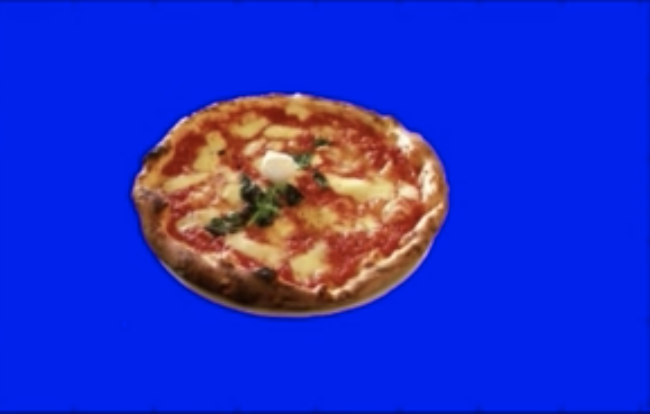

In [3]:
display.Image(IMAGE)

So we can see what it looks like, let's import our image in using OpenCV and view waht openCV sees

In [4]:
image = cv2.imread(IMAGE)

In [5]:
print("Image Dimension:",image.shape)

Image Dimension: (414, 650, 3)


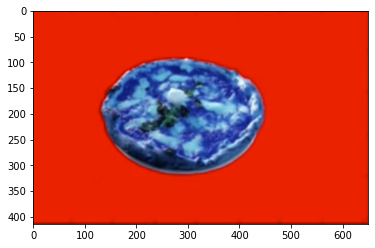

In [6]:
%matplotlib inline
plt.imshow(image);

We can see that the blue part turns to red, thi happens because the way OpenCV reads in an image, so in practice it is best to convert all image from BGR format to RGB format even if they are in RGB format before.

Let's correct that and take a look at it again

In [7]:
image_copy = np.copy(image)

image_copy = cv2.cvtColor(image_copy , cv2.COLOR_BGR2RGB)

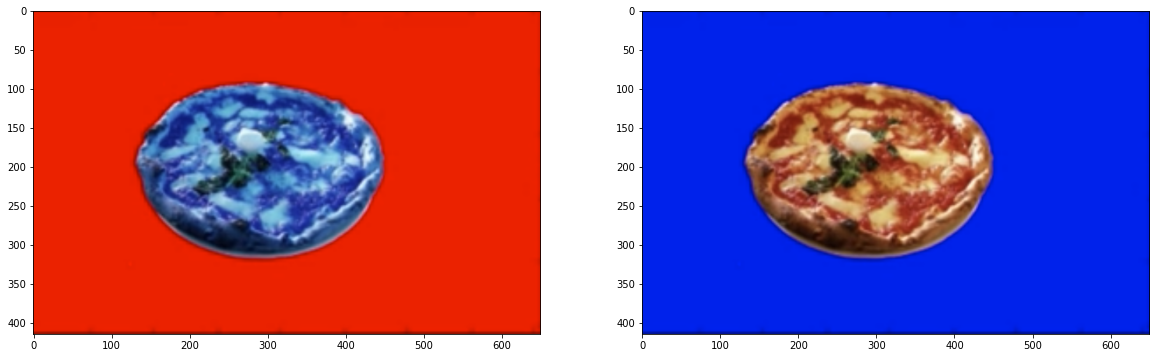

In [8]:
%matplotlib inline
plt.figure(figsize=(20,20))
ax = plt.subplot(121)
ax.imshow(image)
ax = plt.subplot(122)
ax.imshow(image_copy)
plt.show()

We can see that we've resolved that issue with a good practice

### Define Color Threshold

- Define the lower and upper bounf of the color you wan to select

In [9]:
#The boundary specified must be in an array
lower_blue = np.array([0,0,50])
upper_blue = np.array([50,50,255])

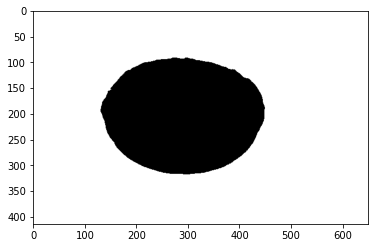

In [10]:
mask = cv2.inRange(image_copy,lower_blue,upper_blue)#the inRange function selects the that falls between the lower an d upper bound we defined
plt.imshow(mask,cmap="gray")

In [11]:
masked_image = np.copy(image_copy)

In [12]:
masked_image[mask != 0] = [0,0,0]
# masked_image[mask == 255] = [0,0,0]

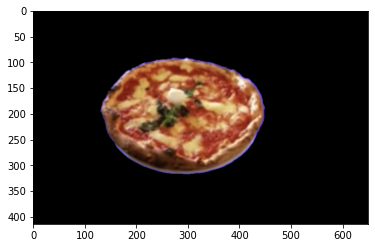

In [13]:
plt.imshow(masked_image)

### Mask and Add Background Image

In [14]:
background_im_dir = "images/wolfgang-hasselmann-yPt6qqZTyOA-unsplash.jpg"
background_image = cv2.imread(background_im_dir)
background_image = cv2.cvtColor(background_image , cv2.COLOR_BGR2RGB)

This is the image we'll be using for our backgroud

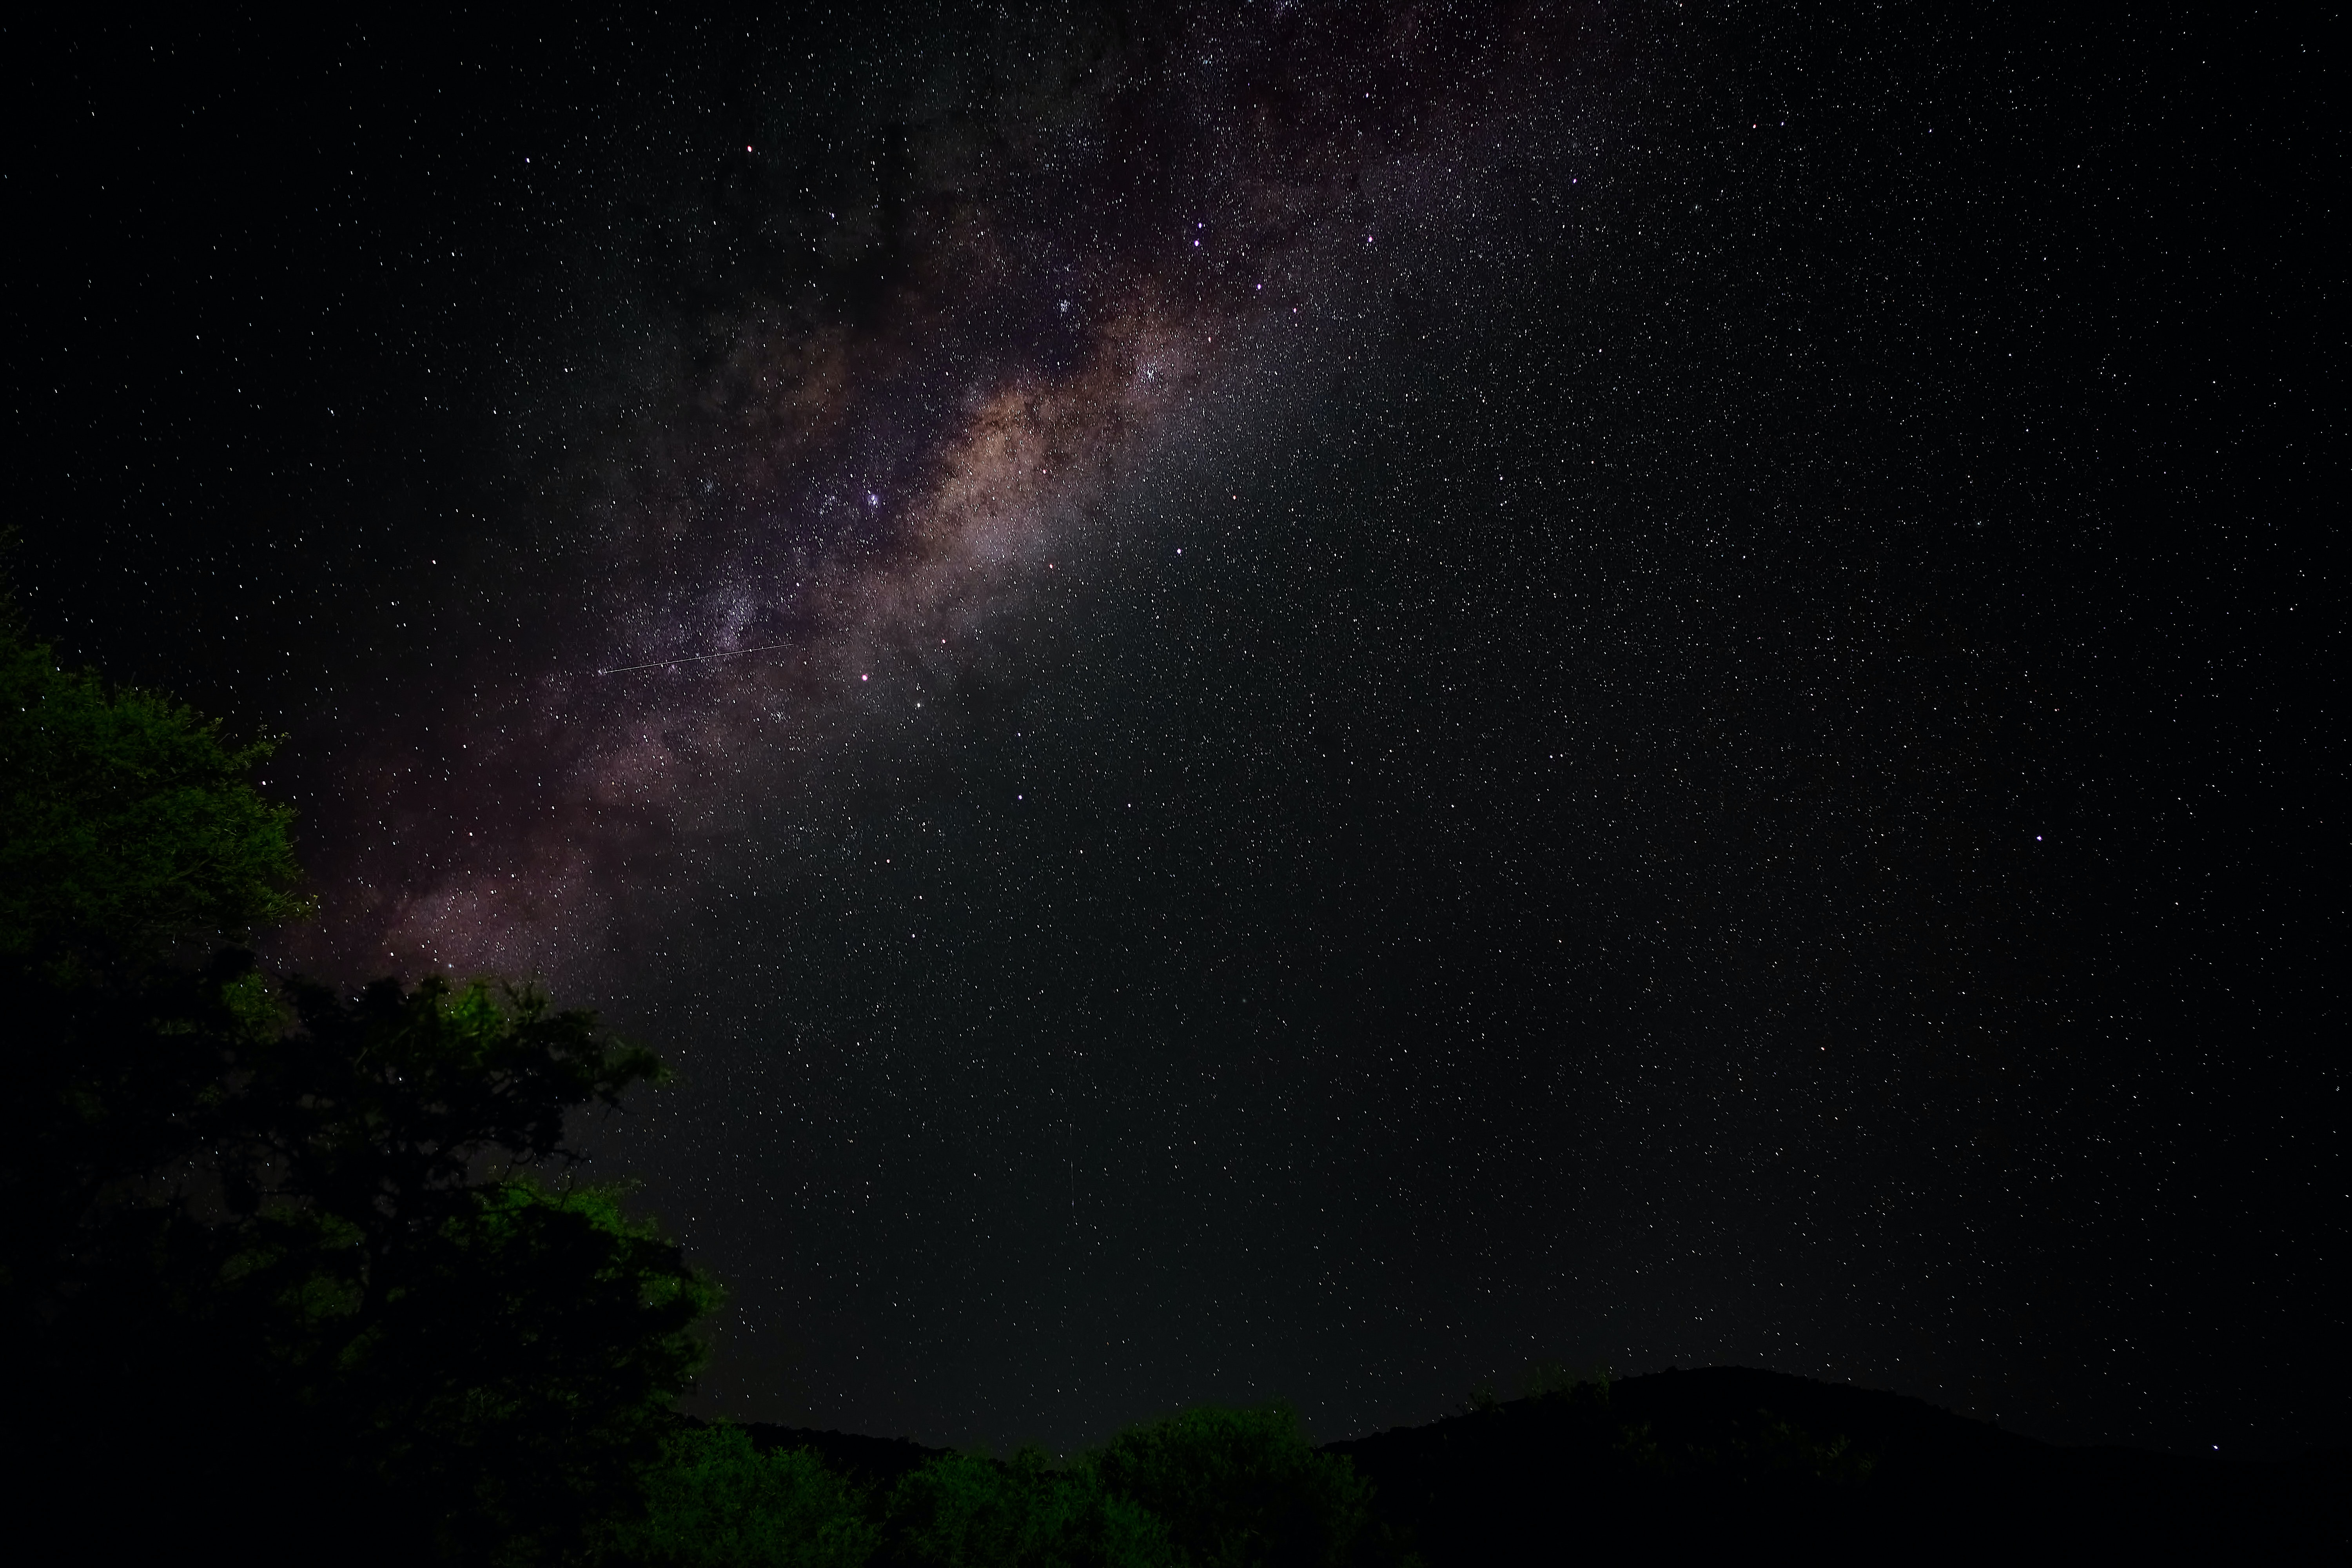

In [15]:
display.Image(background_im_dir)

In [16]:
crop_background = background_image[:414,:650]

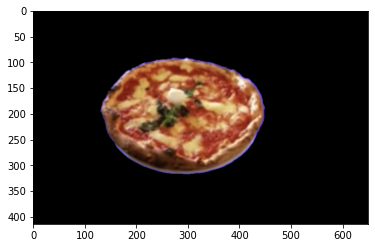

In [17]:
plt.imshow(masked_image)

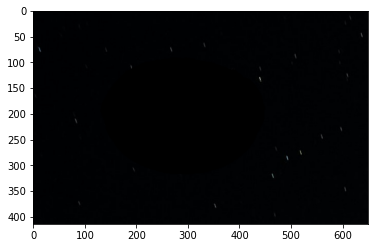

In [18]:
crop_background[mask==0] = [0,0,0]
plt.imshow(crop_background)

In [19]:
complete_image = crop_background + masked_image

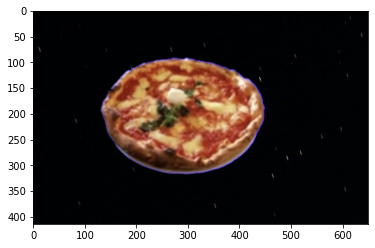

In [20]:
plt.imshow(complete_image)